<a href="https://colab.research.google.com/github/SolarHO/FloodDamage_BigData/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%B9%A8%EC%88%98_%EC%9E%AC%EC%82%B0%ED%94%BC%ED%95%B4_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7. 서울시 침수 재산피해 통계

7-1. 데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("자연재해+발생+및+피해+현황_20241110115122.csv")

# 칼럼 새로 지정
df.columns = [
    "자치구별(1)", "자치구별(2)", "사망및실종(명)", "부상(명)", "이재민(명)",
    "주택침수세대(세대)", "전체피해액(천원)", "건물피해액(천원)", "선박피해액(천원)",
    "농경지피해액(천원)", "공공시설피해액(천원)", "사유시설피해액(천원)"
]

# 기존 인덱스 제거 및 불필요한 행 제거
df = df.iloc[2:].reset_index(drop=True)

# "서울시 소계" 행 제거
df = df[df["자치구별(2)"] != "소계"].reset_index(drop=True)
print(df)

   자치구별(1) 자치구별(2) 사망및실종(명) 부상(명) 이재민(명) 주택침수세대(세대) 전체피해액(천원) 건물피해액(천원)  \
0      서울시     종로구        -     -      9          3     58000     58000   
1      서울시      중구        -     -      -          -       886         -   
2      서울시     용산구        -     -     17         11    126125     22000   
3      서울시     성동구        -     -      -          -         -         -   
4      서울시     광진구        -     -      -          -         -         -   
5      서울시    동대문구        -     -      7          4      8000      8000   
6      서울시     중랑구        -     -      7          6     12000     12000   
7      서울시     성북구        -     -     52         31    114000    114000   
8      서울시     강북구        -     -    327        191    434000    434000   
9      서울시     도봉구        -     -    177        120    240000    240000   
10     서울시     노원구        -     -    119         79    158000    158000   
11     서울시     은평구        -     -    139         75    150000    150000   
12     서울시    서대문구       

7-2. 자치구별 주택침수세대 비교

<ipython-input-27-ab8abf74c08c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["주택침수세대(세대)"] = pd.to_numeric(df_filtered["주택침수세대(세대)"], errors="coerce")


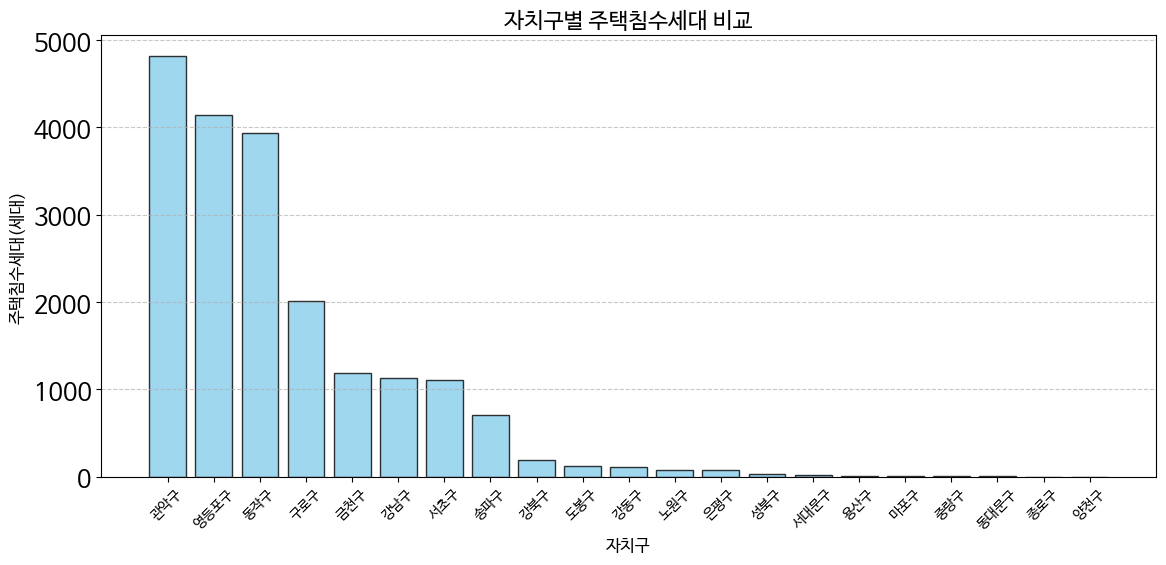

In [ ]:
# 자치구별 주택침수세대 데이터 추출
df_filtered = df[["자치구별(2)", "주택침수세대(세대)"]]

# 주택침수세대를 숫자로 변환
df_filtered["주택침수세대(세대)"] = pd.to_numeric(df_filtered["주택침수세대(세대)"], errors="coerce")

# NaN 값 제거
df_filtered = df_filtered.dropna()

# 시각화를 위한 데이터 정렬
df_sorted = df_filtered.sort_values(by="주택침수세대(세대)", ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(df_sorted["자치구별(2)"], df_sorted["주택침수세대(세대)"], color="skyblue", edgecolor="black", alpha=0.8)
plt.title("자치구별 주택침수세대 비교", fontsize=16)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("주택침수세대(세대)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


7-3. 자치구별 피해액(건물,공공시설,전체) 비교

<ipython-input-28-f384d0495e38>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["전체피해액(천원)"] = pd.to_numeric(df_filtered["전체피해액(천원)"], errors="coerce")


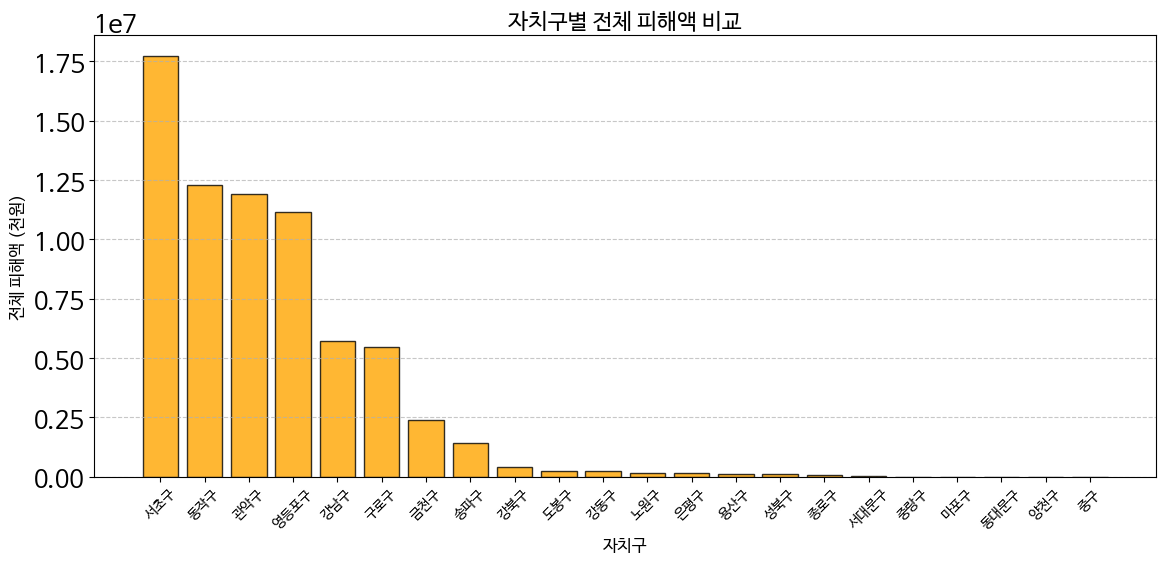

In [ ]:
# 자치구별 전체피해액 데이터 추출
df_filtered = df[["자치구별(2)", "전체피해액(천원)"]]

# 전체피해액을 숫자로 변환
df_filtered["전체피해액(천원)"] = pd.to_numeric(df_filtered["전체피해액(천원)"], errors="coerce")

# NaN 값 제거
df_filtered = df_filtered.dropna()

# 시각화를 위한 데이터 정렬
df_sorted = df_filtered.sort_values(by="전체피해액(천원)", ascending=False)

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(df_sorted["자치구별(2)"], df_sorted["전체피해액(천원)"], color="orange", edgecolor="black", alpha=0.8)
plt.title("자치구별 전체 피해액 비교", fontsize=16)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("전체 피해액 (천원)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-35-6548a8d25691>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["건물피해액(천원)"] = pd.to_numeric(df_filtered["건물피해액(천원)"], errors="coerce")
<ipython-input-35-6548a8d25691>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["공공시설피해액(천원)"] = pd.to_numeric(df_filtered["공공시설피해액(천원)"], errors="coerce")


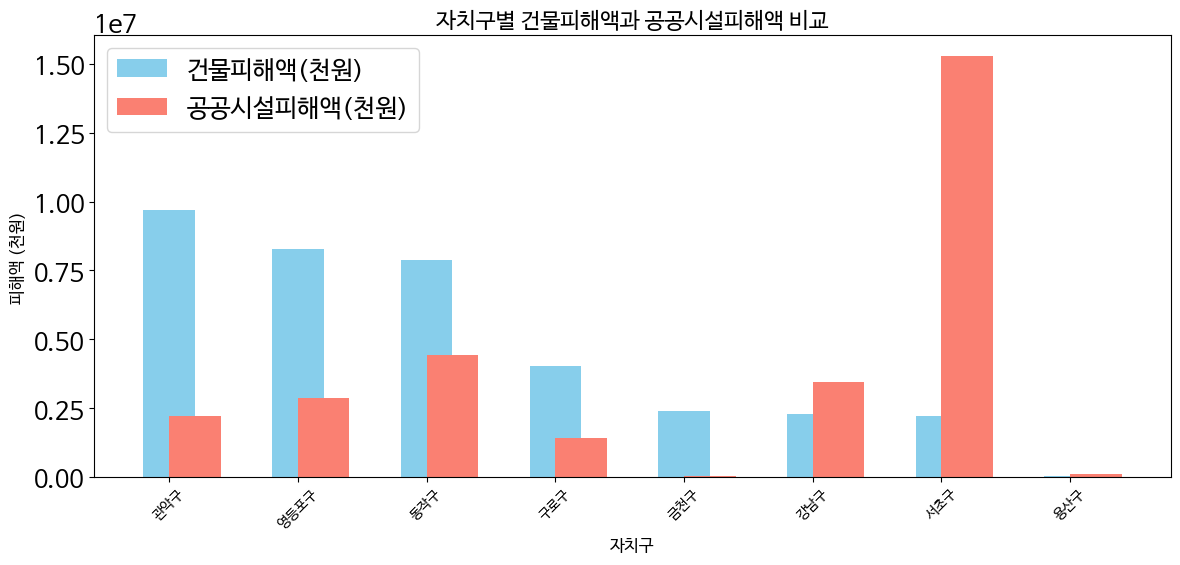

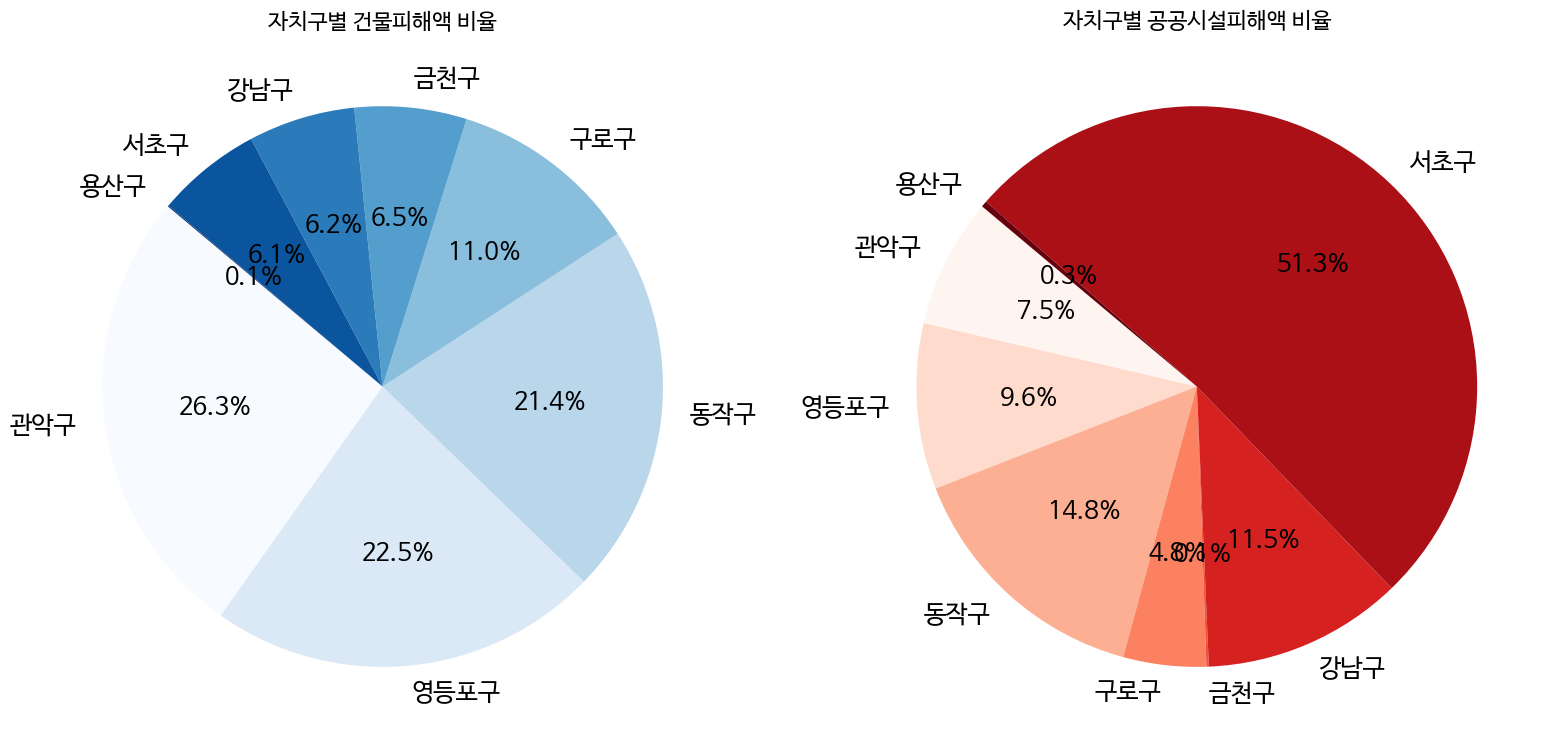

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 자치구별 건물피해액과 공공시설피해액 데이터 추출
df_filtered = df[["자치구별(2)", "건물피해액(천원)", "공공시설피해액(천원)"]]

# 건물피해액과 공공시설피해액을 숫자로 변환
df_filtered["건물피해액(천원)"] = pd.to_numeric(df_filtered["건물피해액(천원)"], errors="coerce")
df_filtered["공공시설피해액(천원)"] = pd.to_numeric(df_filtered["공공시설피해액(천원)"], errors="coerce")

# NaN 값 제거
df_filtered = df_filtered.dropna()

# 데이터 정렬 (건물피해액을 기준으로 정렬)
df_sorted = df_filtered.sort_values(by="건물피해액(천원)", ascending=False)

# 시각화: 두 개의 막대 그래프를 비교
plt.figure(figsize=(12, 6))

# 건물피해액과 공공시설피해액 막대 그래프 생성
plt.bar(df_sorted["자치구별(2)"], df_sorted["건물피해액(천원)"], width=0.4, label="건물피해액(천원)", color="skyblue", align="center")
plt.bar(df_sorted["자치구별(2)"], df_sorted["공공시설피해액(천원)"], width=0.4, label="공공시설피해액(천원)", color="salmon", align="edge")
plt.title("자치구별 건물피해액과 공공시설피해액 비교", fontsize=16)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("피해액 (천원)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

# 두 원 그래프를 가로로 배치
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 원 그래프: 건물피해액
ax1.pie(df_sorted["건물피해액(천원)"], labels=df_sorted["자치구별(2)"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Blues(np.linspace(0, 1, len(df_sorted))))
ax1.set_title("자치구별 건물피해액 비율", fontsize=16)

# 원 그래프: 공공시설피해액
ax2.pie(df_sorted["공공시설피해액(천원)"], labels=df_sorted["자치구별(2)"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Reds(np.linspace(0, 1, len(df_sorted))))
ax2.set_title("자치구별 공공시설피해액 비율", fontsize=16)

plt.tight_layout()
plt.show()
